<a href="https://colab.research.google.com/github/TChen90/TensorFlow/blob/master/Coursera%20Getting%20started%20with%20TensorFlow2/Week_3_Validation_regularisation_and_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [0]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [0]:
# Save the input and target variables
print(diabetes_dataset.keys())

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [0]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()

targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [0]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(train_targets.shape)

(397, 10)
(45, 10)
(397,)
(397,)


#### Train a feedforward neural network model

In [0]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential([
      Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(1),
  ])
  return model

model = get_model()

In [0]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=['mse'])

In [0]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100,
            validation_split=0.15, batch_size=64)

Epoch 1/100
6/6 [==============================] - 0s 21ms/step - loss: 0.8353 - mse: 0.9882 - val_loss: 0.8602 - val_mse: 1.0077
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8207 - mse: 0.9208 - val_loss: 0.7621 - val_mse: 0.8007
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7116 - mse: 0.7298 - val_loss: 0.5543 - val_mse: 0.5094
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6168 - mse: 0.6011 - val_loss: 0.5211 - val_mse: 0.4206
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5659 - mse: 0.5232 - val_loss: 0.5545 - val_mse: 0.5426
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6039 - mse: 0.5325 - val_loss: 0.5460 - val_mse: 0.4664
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5673 - mse: 0.5248 - val_loss: 0.5302 - val_mse: 0.4223
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5532 - mse: 0.4997 - v

In [0]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 2ms/step - loss: 0.5967 - mse: 0.5907


[0.5966964364051819, 0.590720534324646]

#### Plot the learning curves

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

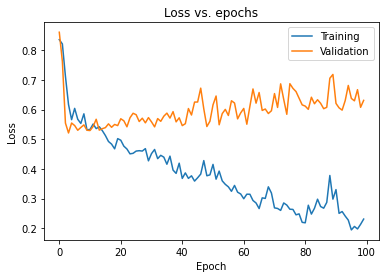

In [0]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [0]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [0]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [0]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5,0.3)

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [0]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64)

Epoch 1/100
6/6 [==============================] - 0s 64ms/step - loss: 0.9621 - mae: 0.8518 - val_loss: 1.0406 - val_mae: 0.8778
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9482 - mae: 0.8456 - val_loss: 0.9754 - val_mae: 0.8524
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9091 - mae: 0.8238 - val_loss: 0.8311 - val_mae: 0.7824
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7857 - mae: 0.7616 - val_loss: 0.6003 - val_mae: 0.6585
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6284 - mae: 0.6696 - val_loss: 0.5170 - val_mae: 0.5605
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5842 - mae: 0.6331 - val_loss: 0.4613 - val_mae: 0.5500
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5980 - mae: 0.6083 - val_loss: 0.5364 - val_mae: 0.5871
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6074 - mae: 0.6298 - v

In [0]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 3ms/step - loss: 0.4288 - mae: 0.4717


[0.4287838339805603, 0.4716525673866272]

#### Plot the learning curves

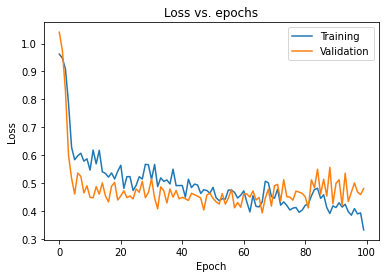

In [0]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [0]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):

  def on_train_begin(self, logs=None):
    print('Starting training...')
  
  def on_epoch_begin(self, epoch, logs=None):
    print(f'Starting epoch {epoch}')
  
  def on_train_batch_begin(self, batch, logs=None):
    print(f'Training: Starting batch {batch}')
  
  def on_train_batch_end(self, batch, logs=None):
    print(f'Training: Finished batch {batch}')
  
  def on_epoch_end(self, epoch, logs=None):
    print(f'Finished epoch {epoch}')
  
  def on_train_end(sefl, logs=None):
    print('Finished training!')

In [0]:
 class TestingCallback(Callback):

  def on_test_begin(self, logs=None):
    print('Starting testing...')
  
  def on_test_batch_begin(self, batch, logs=None):
    print(f'Testing: Starting batch {batch}')
  
  def on_test_batch_end(self, batch, logs=None):
    print(f'Testing: Finished batch {batch}')
  
  def on_test_end(sefl, logs=None):
    print('Finished testing!')

In [0]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)

In [0]:
# Compile the model

model.compile(optimizer='adam', loss='mse')

#### Train the model with the callback

In [0]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs=3, batch_size=128, callbacks=(TrainingCallback()))

Starting training...
Starting epoch 0
Epoch 1/3
Training: Starting batch 0
Training: Finished batch 0
1/4 [======>.......................] - ETA: 0s - loss: 1.0676Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
4/4 [==============================] - 0s 6ms/step - loss: 0.9997
Starting epoch 1
Epoch 2/3
Training: Starting batch 0
Training: Finished batch 0
1/4 [======>.......................] - ETA: 0s - loss: 1.0255Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
4/4 [==============================] - 0s 5ms/step - loss: 0.9382
Starting epoch 2
Epoch 3/3
Training: Starting batch 0
Training: Finished batch 0
1/4 [======>.......................] - ETA: 0s - loss: 1.0076Training: Starting batch 1
Training: Finished batch 1
Training:

In [0]:
# Evaluate the model
model.evaluate(test_data, test_targets, callbacks=[TestingCallback()])

Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
1/2 [==============>...............] - ETA: 0s - loss: 0.8195Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!
2/2 [==============================] - 0s 3ms/step - loss: 0.8986


0.8986217379570007

In [0]:
 class PredictionCallback(Callback):

  def on_predict_begin(self, logs=None):
    print('Starting predicing...')
  
  def on_test_predic_begin(self, batch, logs=None):
    print(f'Predicing: Starting batch {batch}')
  
  def on_test_predic_end(self, batch, logs=None):
    print(f'Predicing: Finished batch {batch}')
  
  def on_predic_end(sefl, logs=None):
    print('Finished Predicing!')

In [0]:
# Make predictions with the model
model.predict(test_data, callbacks=[PredictionCallback()])

Starting predicing...


array([[ 0.02732543],
       [ 0.02137152],
       [ 0.04029779],
       [ 0.07286678],
       [ 0.15121531],
       [-0.01585299],
       [ 0.15077063],
       [ 0.07837333],
       [ 0.01898672],
       [ 0.04353425],
       [ 0.15613246],
       [ 0.09027264],
       [-0.00113728],
       [ 0.114168  ],
       [ 0.13303347],
       [-0.0192655 ],
       [ 0.12666675],
       [ 0.00102235],
       [-0.01630171],
       [ 0.12857792],
       [ 0.11230619],
       [-0.01497575],
       [ 0.03676221],
       [ 0.0869849 ],
       [ 0.03271674],
       [ 0.04173081],
       [-0.00467347],
       [ 0.10531923],
       [ 0.11275423],
       [-0.01140966],
       [ 0.02505879],
       [ 0.1277159 ],
       [ 0.06542011],
       [ 0.00465408],
       [ 0.09644634],
       [ 0.10690457],
       [ 0.10793957],
       [ 0.02668918],
       [ 0.04535607],
       [ 0.07237206],
       [ 0.07514898],
       [ 0.11192812],
       [ 0.10105938],
       [ 0.15206257],
       [ 0.1346633 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [0]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(train_data, train_targets, epochs=100, validation_split=0.15,
                                        batch_size=64, 
                                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/100
6/6 [==============================] - 0s 19ms/step - loss: 0.9873 - val_loss: 1.0101
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.8977 - val_loss: 0.8421
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7043 - val_loss: 0.5674
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5987 - val_loss: 0.5661
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5956 - val_loss: 0.4563
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5369 - val_loss: 0.5091
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4917 - val_loss: 0.4699


In [0]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 3ms/step - loss: 0.3904


0.39039450883865356

In [0]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_history = regularised_model.fit(train_data, train_targets, epochs=100, validation_split=0.15,
                                    batch_size=64, 
                                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/100
6/6 [==============================] - 0s 26ms/step - loss: 0.9582 - val_loss: 1.0237
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9738 - val_loss: 0.8875
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8190 - val_loss: 0.6264
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6720 - val_loss: 0.4626
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6463 - val_loss: 0.4163
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6204 - val_loss: 0.4442
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6360 - val_loss: 0.4670


In [0]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 2ms/step - loss: 0.4011


0.40111029148101807

#### Plot the learning curves

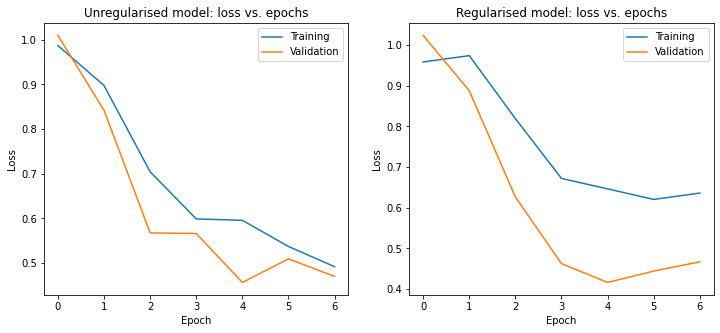

In [0]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()